In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('./dataframe.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df[df.language != 'Dutch']
df = df[df.error_type != 'S']
df = df[df.error_type != 'SA']
df = df[df.error_type != 'SX']

In [3]:
def concat_dummies(df, dummies):
    for dummy in list(dummies):
        df[dummy] = dummies[dummy]
    return list(dummies)

In [4]:
def create_dummies(df, column, prefix):
    dummies = pd.get_dummies(df[column], prefix=prefix)
    return concat_dummies(df, dummies)

In [5]:
w_first_pos = create_dummies(df, 'error_pos', 'w_first_pos')
w_second_pos = create_dummies(df, 'error_pos_2', 'w_second_pos')
w_third_pos = create_dummies(df, 'error_pos_3', 'w_third_pos')
c_first_pos = create_dummies(df, 'correct_pos', 'c_first_pos')
c_second_pos = create_dummies(df, 'correct_pos_2', 'c_second_pos')
c_third_pos = create_dummies(df, 'correct_pos_3', 'c_third_pos')

In [6]:
w_first_dep = create_dummies(df, 'e_dep', 'w_first_dep')
w_second_dep = create_dummies(df, 'e_dep_2', 'w_second_dep')
w_third_dep = create_dummies(df, 'e_dep_3', 'w_third_dep')
c_first_dep = create_dummies(df, 'c_dep', 'c_first_dep')
c_second_dep = create_dummies(df, 'c_dep_2', 'c_second_dep')
c_third_dep = create_dummies(df, 'c_dep_3', 'c_third_dep')

In [7]:
languages = {'language': {'French': 1, 'Spanish': 2, 'Catalan': 3, 'Portuguese': 4, 'Italian': 5, 'Polish': 6, 'Russian': 7,
'Greek': 8,'German': 9, 'Swedish': 10, 'Japanese': 11, 'Korean': 12, 'Turkish': 13, 'Chinese': 14, 'Thai':15}}
df.replace(languages, inplace=True)

In [8]:
y = df['error_type']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.15)
fit_data = x_train[list(w_first_pos) + list(w_second_pos)
        + list(w_third_pos) + list(c_first_pos) + list(c_second_pos) 
        + list(c_third_pos) + list(w_first_dep) + list(w_second_dep) 
        + list(w_third_dep) + list(c_first_dep) + list(c_second_dep) 
        + list(c_third_dep) + ['language', 'error_length',
         'first_first_pos', 'first_second_pos', 'first_third_pos',
         'second_first_pos', 'second_second_pos', 'second_third_pos',
         'third_first_pos', 'third_second_pos', 'third_third_pos',
         'first_first_dep', 'first_second_dep', 'first_third_dep',
         'second_first_dep', 'second_second_dep', 'second_third_dep',
         'third_first_dep', 'third_second_dep', 'third_third_dep']]
test_data = x_test[list(w_first_pos) + list(w_second_pos)
        + list(w_third_pos) + list(c_first_pos) + list(c_second_pos)
        + list(c_third_pos) + list(w_first_dep) + list(w_second_dep) 
        + list(w_third_dep) + list(c_first_dep) + list(c_second_dep) 
        + list(c_third_dep) + ['language', 'error_length',
         'first_first_pos', 'first_second_pos', 'first_third_pos',
         'second_first_pos', 'second_second_pos', 'second_third_pos',
         'third_first_pos', 'third_second_pos', 'third_third_pos',
         'first_first_dep', 'first_second_dep', 'first_third_dep',
         'second_first_dep', 'second_second_dep', 'second_third_dep',
         'third_first_dep', 'third_second_dep', 'third_third_dep']]

In [10]:
clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=0)
clf.fit(fit_data, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
clf.score(test_data, y_test)

0.7396140749148694

In [12]:
f = open('errors_new.csv', 'w')
f.write('wrong_errotype, correct_errortype, error_position, wrong_excerpt, correct_excerpt, wrong_sentence, correct_sentence\n')
predictions = clf.predict(test_data)
lines = x_test['line'].tolist()
error_positions = x_test['error_position'].tolist()
correct_sentences = x_test['correct_sentence'].tolist()
values = list(y_test)
for i in range(len(predictions)):
    if predictions[i] != values[i]:
        init = max(error_positions[i] - 3, 0)
        end = min(error_positions[i] + 3, len(lines[i].split()))
        f.write(predictions[i] + ',' + values[i] + ',' + str(error_positions[i]) + ',' + ' '.join(lines[i].split()[init:end]) + ',' + ' '.join(correct_sentences[i].split()[init:end]) + ',' + lines[i] + ',' + correct_sentences[i] + '\n')
f.close()

In [34]:
from sklearn.metrics import confusion_matrix
labels = sorted(list(set(list(y_test) + list(predictions))))
cm = confusion_matrix(y_test, predictions, labels)
print(cm)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_norm)

[[ 12   0   0 ...   0   0   0]
 [  0   8   0 ...   0   0   0]
 [  0   0  65 ...   0   0   0]
 ...
 [  0   0   0 ...  28   2   0]
 [  0   0   0 ...   1 151   0]
 [  0   0   0 ...   0   3   6]]
[[0.48       0.         0.         ... 0.         0.         0.        ]
 [0.         0.42105263 0.         ... 0.         0.         0.        ]
 [0.         0.         0.59090909 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.62222222 0.04444444 0.        ]
 [0.         0.         0.         ... 0.00552486 0.83425414 0.        ]
 [0.         0.         0.         ... 0.         0.125      0.25      ]]


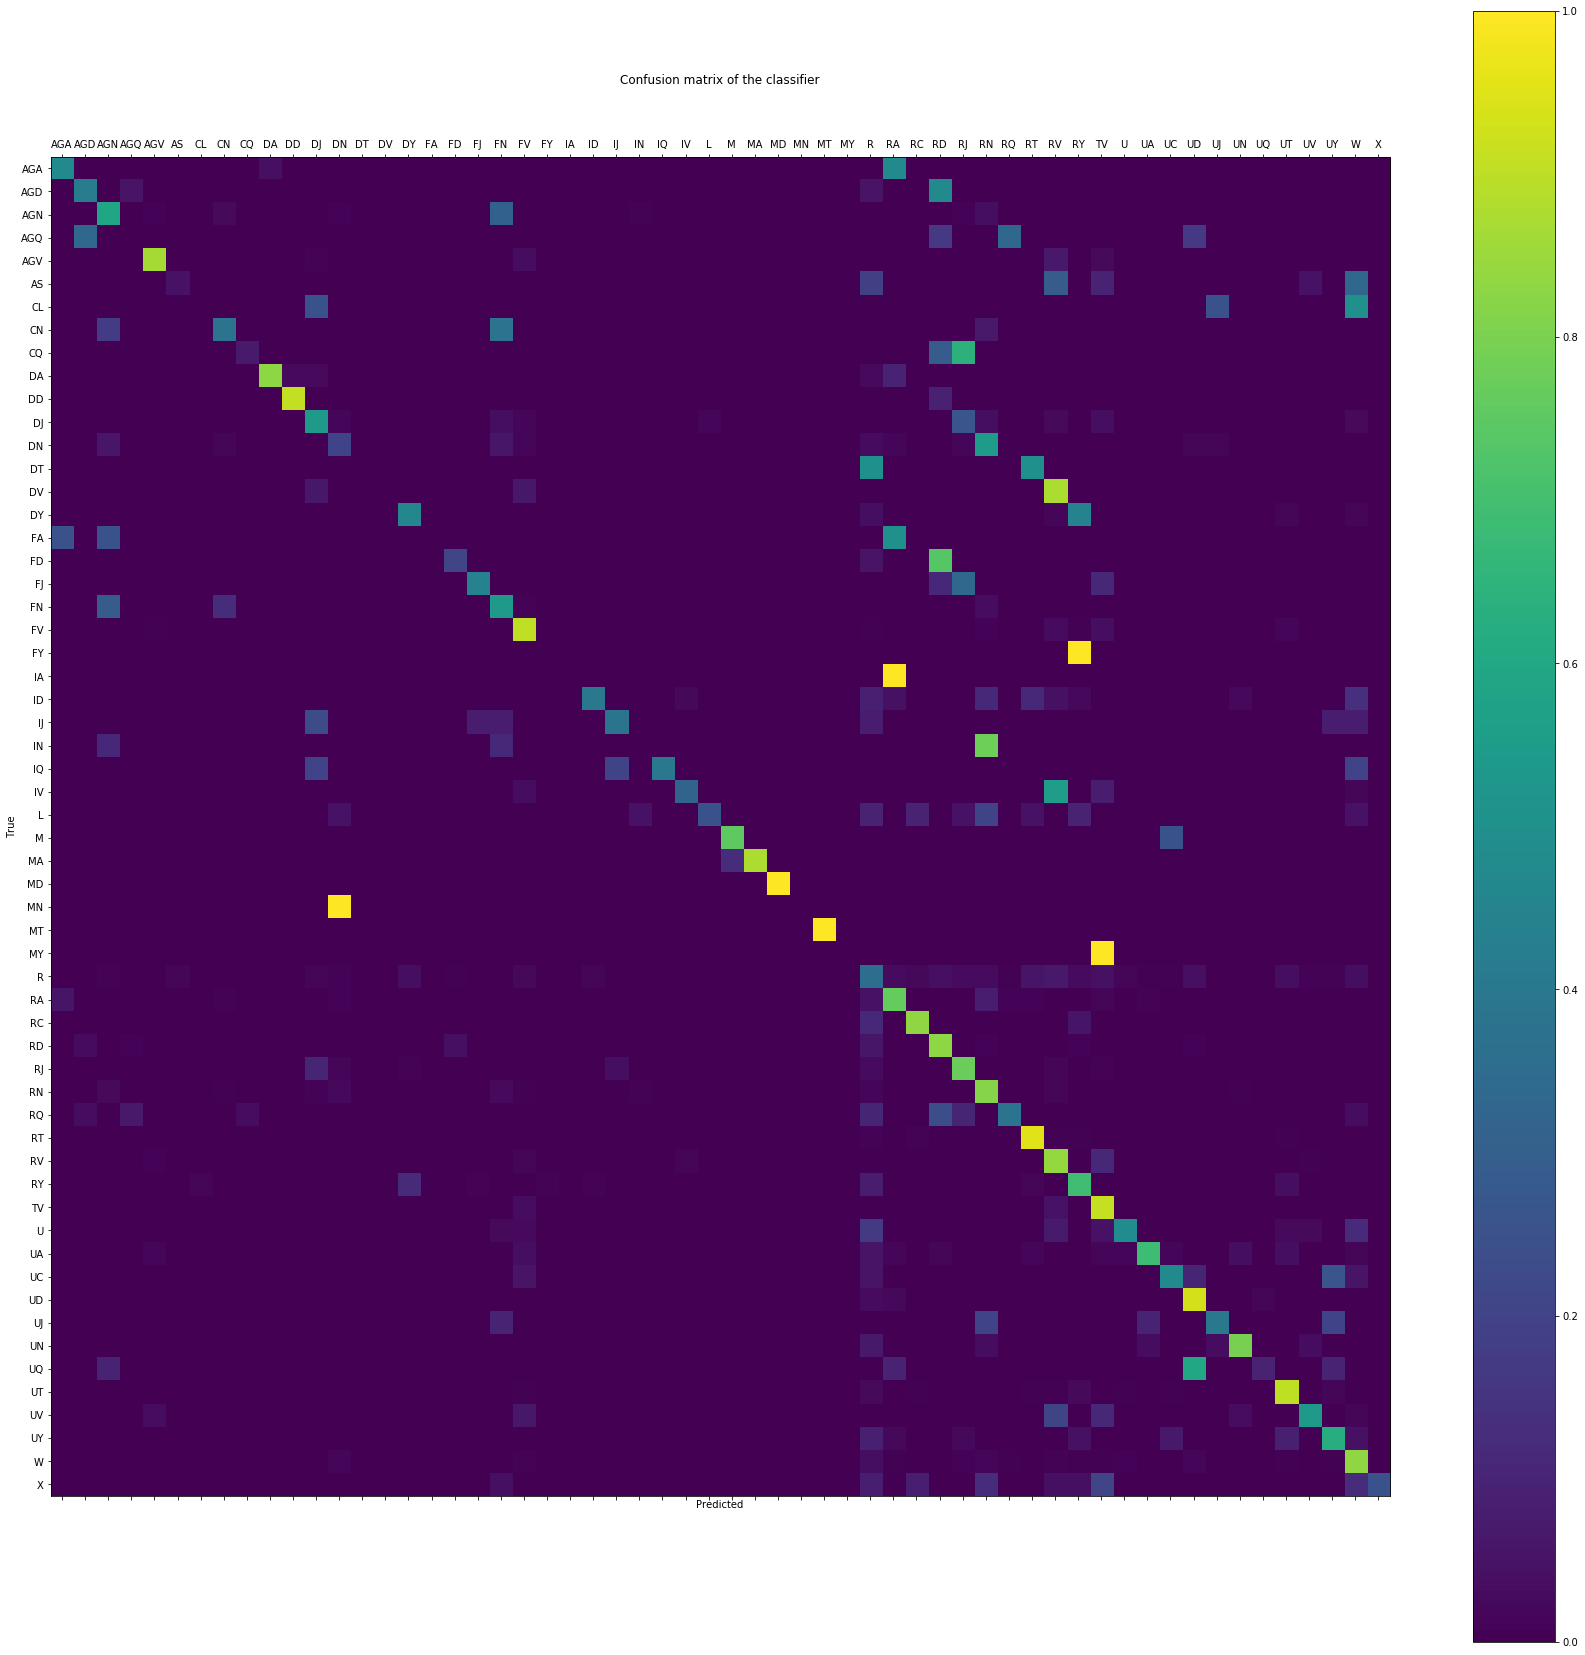

In [37]:
import numpy as np
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
importances = pd.DataFrame({'feature': list(fit_data), 'feature_importance': clf.feature_importances_})
importances = importances.set_index('feature')

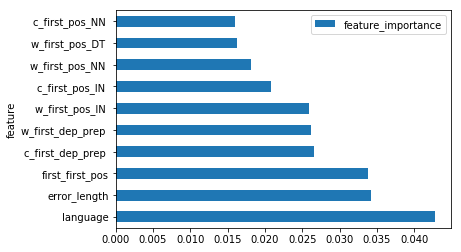

In [14]:
importances = importances.sort_values(by=['feature_importance'], ascending=False)
top_10 = importances[:10]
top_10.plot(kind='barh')